In [2]:
import pandas as pd
from datautils import _get_time_features,load_forecast_csv

In [8]:
import os

current_directory = os.getcwd()
print("Current Directory:", current_directory)

Current Directory: /Users/katoutsubasa/ts2vec


In [9]:
#data, train_slice, valid_slice, test_slice, scaler, pred_lens, n_covariate_cols,data1=load_forecast_csv("mocap",False)
#data, train_slice, valid_slice, test_slice, scaler, pred_lens, data1=load_forecast_csv("mocap_number",False)
import numpy as np
import matplotlib.pyplot as plt

# テキストファイルを読み込む
data = np.loadtxt('datasets/UCR/ECG200/car/car/dis_base_1m_txt/03_01.txt')

data

array([[ 1.26020179e-01,  5.87331839e+00,  3.67578475e-01, ...,
         2.97134229e-03, -1.08468539e-02,  5.67637197e-02],
       [ 7.78666667e+00,  3.10833333e+01,  1.62100000e+01, ...,
         1.22102147e-01, -3.13802022e-02,  1.96800700e+00],
       [ 1.02616667e+01, -3.09166667e+01,  1.75166667e+01, ...,
         1.27641310e-01, -2.90993688e-02,  2.09575700e+00],
       ...,
       [ 2.71375000e+01,  5.00000000e-01,  3.53000000e+00, ...,
        -1.53995179e-02,  8.04563318e-03,  1.93420070e+01],
       [ 2.68875000e+01,  0.00000000e+00,  3.53000000e+00, ...,
        -1.63770179e-02,  1.00006329e-02,  2.06560070e+01],
       [ 2.68175000e+01,  0.00000000e+00,  2.94250000e+00, ...,
        -1.24670182e-02,  1.00006327e-02,  2.37950070e+01]])

In [10]:
data.shape

(3241, 7)

In [12]:
data1=data.reshape(1, 3241, 7)

ValueError: x and y can be no greater than 2D, but have shapes (1,) and (1, 3241, 7)

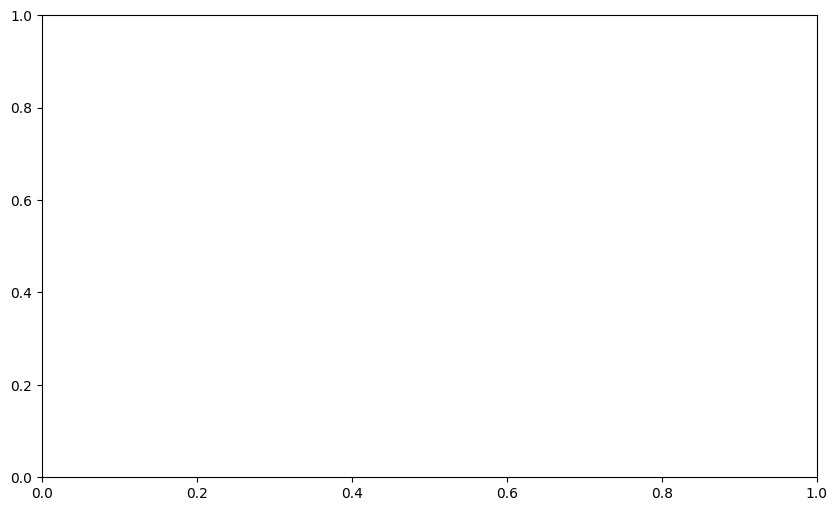

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(data1)

In [14]:
data1.shape[1]

3241

In [15]:
!pip install tensorflow

In [16]:
import random
import numpy as np
import torch

def torch_fix_seed(seed=42):
    # Python random
    random.seed(seed)
    # Numpy
    np.random.seed(seed)
    # Pytorch
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    #torch.use_deterministic_algorithms = True


torch_fix_seed()

In [18]:
from ts2vec import TS2Vec
model = TS2Vec(
    input_dims=data1.shape[-1],
    device="cpu",
    output_dims=320,
    input_total=1,
    #max_train_length=300,
    #output_dims=10
)
loss_log = model.fit(
    data1,
    verbose=True,
    n_iters=600,
    save_model="no_pros_k20.pth"
)

Instructions for updating:
Use tf.identity with explicit device placement instead.


loss
tensor(118779.6484, grad_fn=<DivBackward0>)
Best model updated: loss=118779.6484375
Epoch #0: loss=118779.6484375
loss
tensor(16849.1699, grad_fn=<DivBackward0>)
Best model updated: loss=16849.169921875
Epoch #1: loss=16849.169921875
loss
tensor(5077.4502, grad_fn=<DivBackward0>)
Best model updated: loss=5077.4501953125
Epoch #2: loss=5077.4501953125
loss
tensor(1067.1174, grad_fn=<DivBackward0>)
Best model updated: loss=1067.117431640625
Epoch #3: loss=1067.117431640625
loss
tensor(4936.9658, grad_fn=<DivBackward0>)
Epoch #4: loss=4936.9658203125
loss
tensor(6443.6597, grad_fn=<DivBackward0>)
Epoch #5: loss=6443.65966796875
loss
tensor(7612.9741, grad_fn=<DivBackward0>)
Epoch #6: loss=7612.97412109375
loss
tensor(551.6737, grad_fn=<DivBackward0>)
Best model updated: loss=551.6737060546875
Epoch #7: loss=551.6737060546875
loss
tensor(4046.1990, grad_fn=<DivBackward0>)
Epoch #8: loss=4046.198974609375
loss
tensor(212.3717, grad_fn=<DivBackward0>)
Best model updated: loss=212.371688

In [19]:
model.load('no_pros_k20.pth')

In [20]:
all_repr = model.encode(
        data1,
        causal=False,
        sliding_length=1,
        sliding_padding= 200,
        batch_size=256
    )

a


In [11]:
test_repr = all_repr[:, test_slice]
print(test_repr)

[[[-0.01835824 -0.00070175  0.09143053 ...  0.00815055  0.02035958
    0.2204089 ]
  [-0.01738261  0.00209101  0.09422325 ...  0.01143746  0.01877551
    0.22857279]
  [-0.01651014  0.00507598  0.0964669  ...  0.0146806   0.01695104
    0.23522423]
  ...
  [ 0.00164746  0.00319084 -0.01503605 ... -0.03199832 -0.01347094
   -0.04891144]
  [-0.0018874  -0.00055057 -0.01822835 ... -0.02951522 -0.01412126
   -0.04338642]
  [-0.00143427 -0.00660728 -0.02147318 ... -0.02396189 -0.00998421
   -0.04064143]]]


In [21]:
all_repr.shape

(1, 3241, 320)

In [13]:
test_repr.shape

(1, 257, 320)

In [22]:
test_2d = all_repr.reshape(3241, 320)

In [23]:
from sklearn.cluster import DBSCAN

In [29]:
import numpy as np
data_test=data

In [30]:
data_test.shape

(3241, 7)

In [31]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [32]:
dbscan.fit(test_2d)
labels = dbscan.labels_

In [36]:
labels

array([-1, -1, -1, ..., -1, -1, -1])

In [34]:
#date=data_test.index
date_list=data_test.tolist()

/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_47735/583540433.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)
/Users/katoutsubasa/anaconda3/envs/tstest/lib/python3.8/site-packages/matplotlib/patches.py:1147: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy = np.asarray(xy)


ValueError: setting an array element with a sequence.

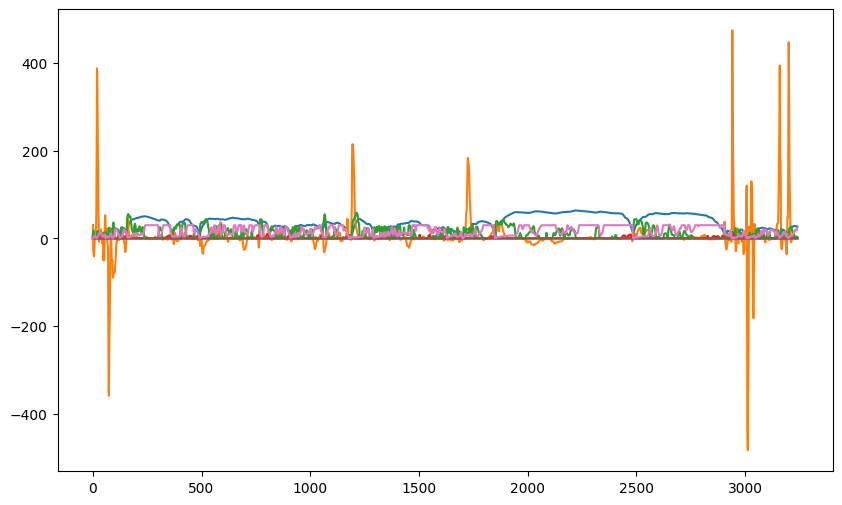

In [35]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test)  # cパラメータにクラスタラベルを渡す
for i in range(len(date_list)-1):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.2)
plt.legend() 
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# AgglomerativeClusteringオブジェクトの作成。ここではクラスタ数を3としています。
agg_clustering = AgglomerativeClustering(n_clusters=5)

# フィッティングとラベルの予測を行います
agg_clustering.fit(test_2d)
labels = agg_clustering.labels_

/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_40637/1211746902.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


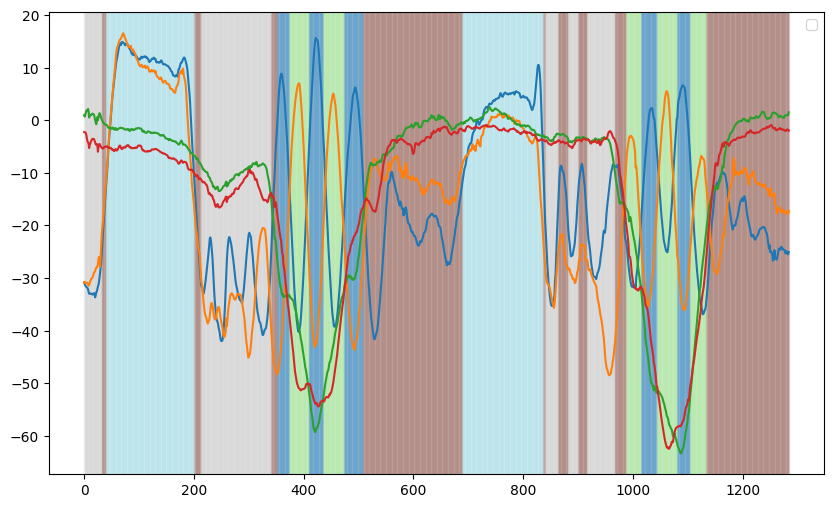

In [ ]:
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test)  # cパラメータにクラスタラベルを渡す
for i in range(len(date_list)-1):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.2)
plt.legend() 
plt.show()

In [27]:
from sklearn.cluster import KMeans

# KMeansオブジェクトの作成。ここではクラスタ数（k）を3としています。
kmeans = KMeans(n_clusters=5)

# フィッティングとラベルの予測を行います
kmeans.fit(test_2d)
labels = kmeans.labels_

/Users/katoutsubasa/anaconda3/envs/tstest/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [28]:
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test)  # cパラメータにクラスタラベルを渡す
for i in range(len(date_list)-1):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.1)
plt.legend() 
plt.show()

NameError: name 'cm' is not defined

/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_40637/3583795887.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


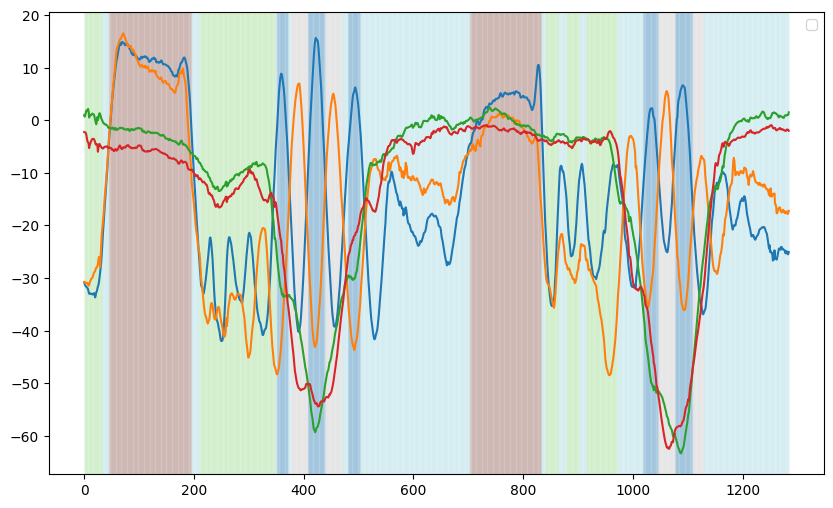

In [ ]:
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test)  # cパラメータにクラスタラベルを渡す
for i in range(len(date_list)-1):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.1)
plt.legend() 
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# KMeansオブジェクトの作成。ここではクラスタ数（k）を3としています。
kmeans = KMeans(n_clusters=4)

# フィッティングとラベルの予測を行います
kmeans.fit(test_2d)
labels = kmeans.labels_

/Users/katoutsubasa/anaconda3/envs/tstest/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_40637/3583795887.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


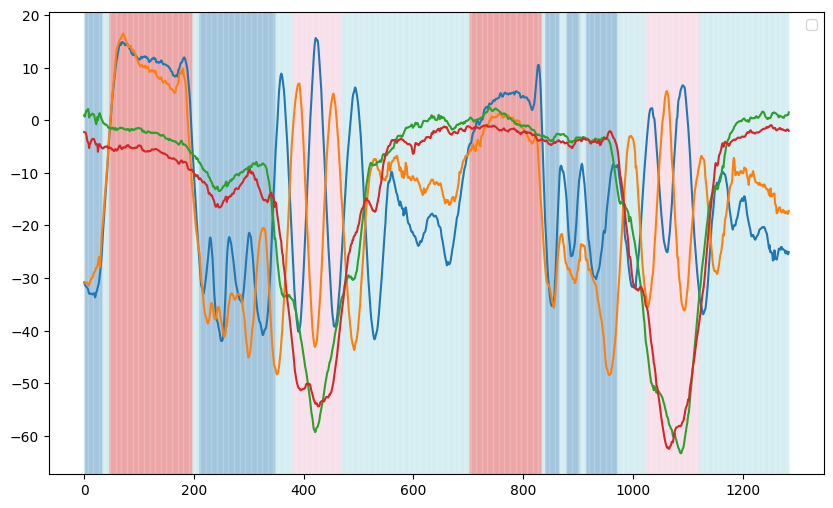

In [ ]:
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test)  # cパラメータにクラスタラベルを渡す
for i in range(len(date_list)-1):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.1)
plt.legend() 
plt.show()

In [ ]:
# KMeansオブジェクトの作成。ここではクラスタ数（k）を3としています。
kmeans = KMeans(n_clusters=3)

# フィッティングとラベルの予測を行います
kmeans.fit(test_2d)
labels = kmeans.labels_

/Users/katoutsubasa/anaconda3/envs/tstest/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_40637/3583795887.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


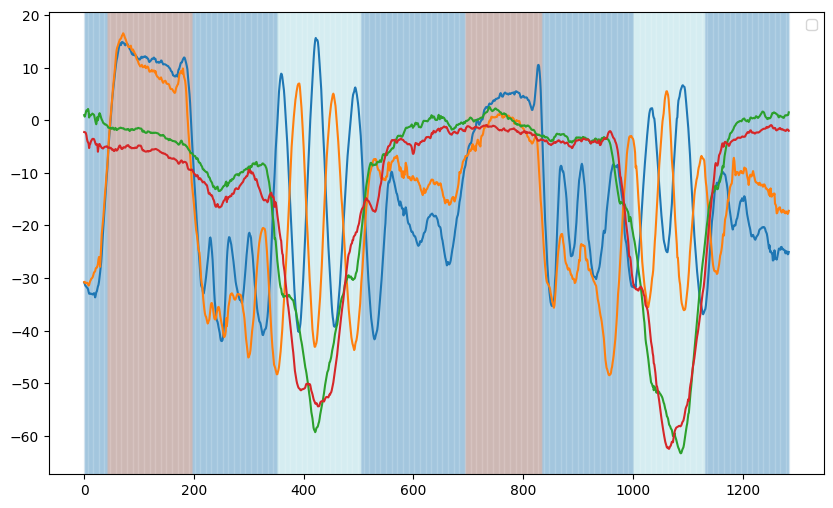

In [ ]:
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test)  # cパラメータにクラスタラベルを渡す
for i in range(len(date_list)-1):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.1)
plt.legend() 
plt.show()

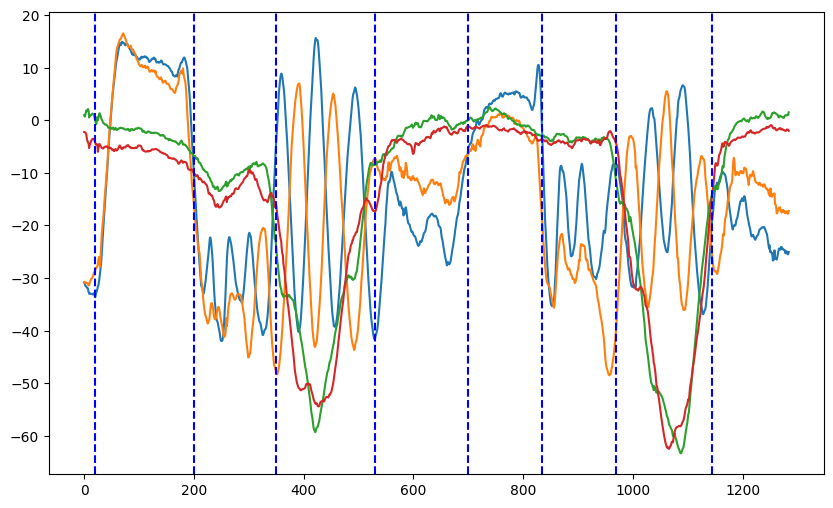

In [ ]:
# 日付をエポック秒に変換
data_test_copy=data_test.copy()
# dateを1,2,3,...に変更
data_test_copy.reset_index(drop=True, inplace=True)
#data_test_copy['date'] = range(1, len(data_test_copy) + 1)
data_test_copy
plt.figure(figsize=(10, 6))
plt.plot(data_test_copy) 
plt.axvline(x=19, color='b', linestyle='--')
plt.axvline(x=200, color='b', linestyle='--')
plt.axvline(x=350, color='b', linestyle='--')
plt.axvline(x=530, color='b', linestyle='--')
plt.axvline(x=700, color='b', linestyle='--')
plt.axvline(x=835, color='b', linestyle='--')
plt.axvline(x=970, color='b', linestyle='--')
plt.axvline(x=1145, color='b', linestyle='--')

/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_40637/1855845376.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)


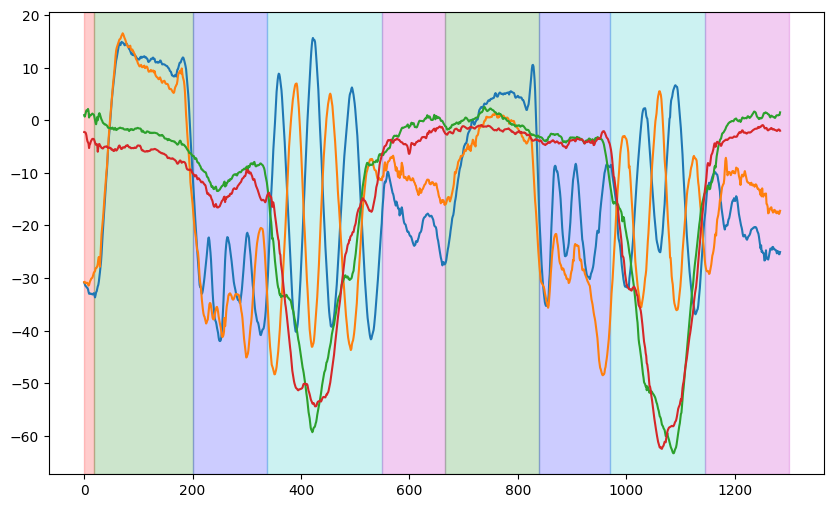

In [32]:
# 日付をエポック秒に変換
data_test_copy=data_test.copy()
# dateを1,2,3,...に変更
data_test_copy.reset_index(drop=True, inplace=True)
#data_test_copy['date'] = range(1, len(data_test_copy) + 1)
data_test_copy
plt.figure(figsize=(10, 6))

regime_list=[0,19,200,338,550,665,840,970,1145,1300]
colors =  ["r", "g", "b", "c", "m", "g", "b", "c","m","y"]
plt.plot(data_test_copy) 
num_clusters = len(set(regime_list))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
for i in range(len(regime_list)-1):
    plt.axvspan(regime_list[i], regime_list[i+1], color=colors[i], alpha=0.2)

In [33]:
from sklearn.manifold import TSNE
regime_list=[0,19,200,338,550,665,840,970,1145,1300]
# t-SNEのモデルを作成
tsne = TSNE(n_components=3, random_state = 0, perplexity = 30, n_iter = 10000)

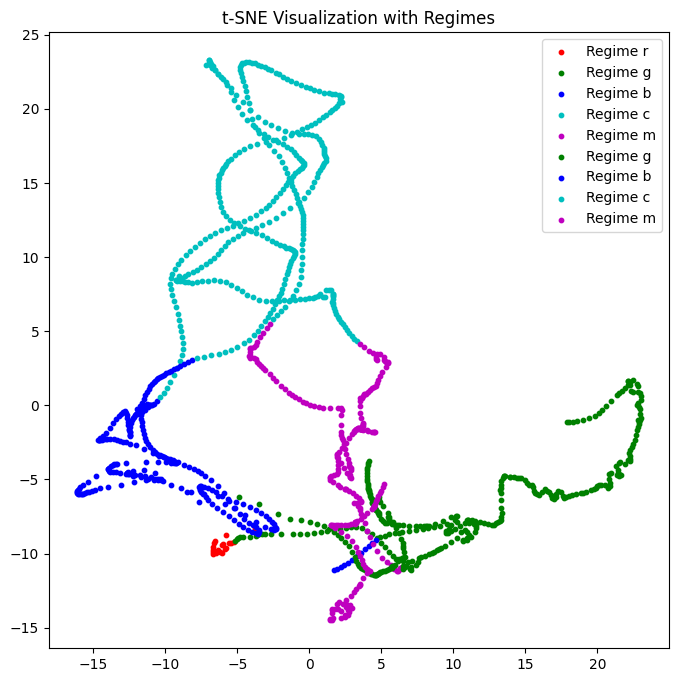

In [34]:
# 高次元データを低次元に変換
data_tsne = tsne.fit_transform(test_2d)
regime_label=[0,1,2,3,4,1,2,3,4,5]

# 各regimeごとに色を指定
colors =  ["r", "g", "b", "c", "m", "g", "b", "c","m","y"]

# プロット
plt.figure(figsize=(8, 8))

for i in range(len(regime_list) - 1):
    start_idx = regime_list[i]
    end_idx = regime_list[i + 1]
    plt.scatter(
        data_tsne[start_idx:end_idx, 0],
        data_tsne[start_idx:end_idx, 1],
        color=colors[i],
        label=f"Regime {colors[i]}",
        s=10
    )
plt.title("t-SNE Visualization with Regimes")
plt.legend()
plt.show()

In [35]:
from sklearn.manifold import TSNE
regime_list=[0,19,200,338,550,665,840,970,1145,1300]
# t-SNEのモデルを作成
tsne = TSNE(n_components=2, random_state = 0, perplexity = 30, n_iter = 10000)

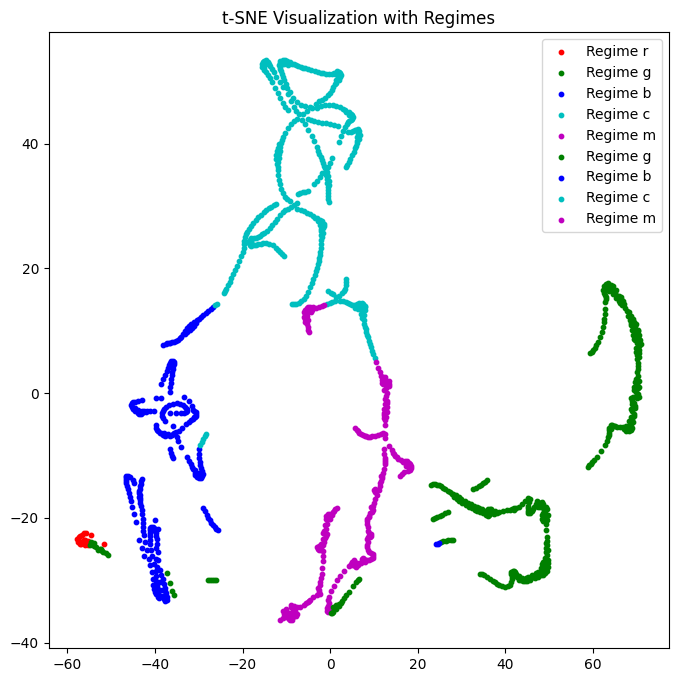

In [36]:
# 高次元データを低次元に変換
data_tsne = tsne.fit_transform(test_2d)
regime_label=[0,1,2,3,4,1,2,3,4,5]

# 各regimeごとに色を指定
colors =  ["r", "g", "b", "c", "m", "g", "b", "c","m","y"]

# プロット
plt.figure(figsize=(8, 8))

for i in range(len(regime_list) - 1):
    start_idx = regime_list[i]
    end_idx = regime_list[i + 1]
    plt.scatter(
        data_tsne[start_idx:end_idx, 0],
        data_tsne[start_idx:end_idx, 1],
        color=colors[i],
        label=f"Regime {colors[i]}",
        s=10
    )
plt.title("t-SNE Visualization with Regimes")
plt.legend()
plt.show()